<ipython-input-4-3748cb5dfc43>:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors_dict[i] = plt.cm.get_cmap('tab10')(i % 10)
<ipython-input-4-3748cb5dfc43>:64: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(point[0], point[1], c=colors_dict[i+1], s=100, marker='o', edgecolor='none', alpha=1)
<ipython-input-4-3748cb5dfc43>:65: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the 

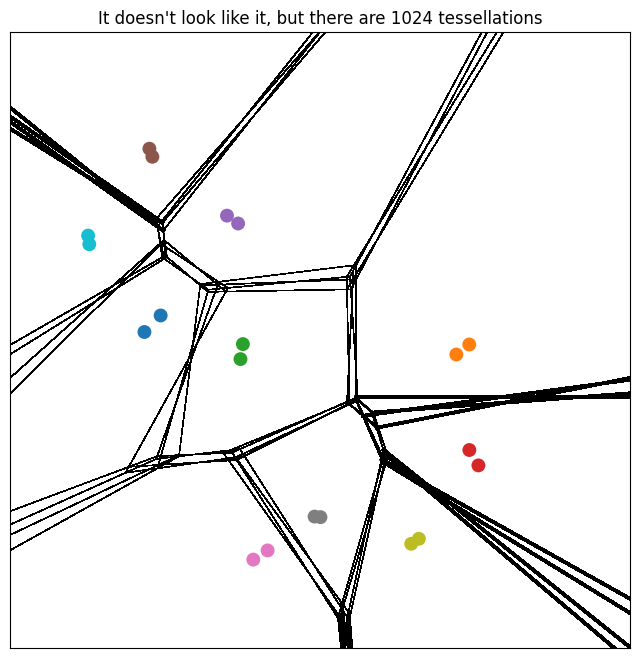

In [ ]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
import itertools

xmin, xmax, ymin, ymax, min_dist = 10, 90, 10, 90, 10

# Generate initial set of points
points = []
for _ in range(10):
    while True:
        x, y = np.random.uniform(xmin, xmax), np.random.uniform(ymin, ymax)
        point = np.array([x, y])

        if all(np.linalg.norm(point - p) >= min_dist for p in points):
            points.append(point)
            break
points = np.array(points)

# Generate translations (deplacements)
delta_x = np.random.uniform(-3, 3, 10)
delta_y = np.random.uniform(-3, 3, 10)
deplacements = np.column_stack((delta_x, delta_y))

# Generate binary sequences
binary_sequences = list(itertools.product([0, 1], repeat=10))

# Create a color dictionary for the points
colors_dict = {}
for i in range(1, 11):
    colors_dict[i] = plt.cm.get_cmap('tab10')(i % 10)

# Plotting
fig, ax = plt.subplots(figsize=(8, 8))

# Calculate the center of all points to use in the line drawing
center = points.mean(axis=0)

# Iterate over binary sequences to create Voronoi tessellations
for seq in binary_sequences:
    permutation_points = np.array([points[i] + deplacements[i] * seq[i] for i in range(10)])
    vor = Voronoi(permutation_points)

    # Draw Voronoi diagram
    voronoi_plot_2d(vor, show_points=False, show_vertices=False, ax=ax, line_colors='black', line_width=0.5, alpha=0.5)

    # Draw solid lines for infinite ridges
    for pointidx, simplex in zip(vor.ridge_points, vor.ridge_vertices):
        simplex = np.asarray(simplex)
        if np.any(simplex < 0):
            i = simplex[simplex >= 0][0]  # finite end Voronoi vertex
            t = vor.points[pointidx[1]] - vor.points[pointidx[0]]  # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal
            midpoint = vor.points[pointidx].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[i] + direction * vor.points.ptp(axis=0).max()
            ax.plot([vor.vertices[i,0], far_point[0]],
                    [vor.vertices[i,1], far_point[1]], 'k-', lw=2.0)

# Plot the points and their translations with lines indicating the translations
for i, point in enumerate(points):
    translated_point = point + deplacements[i]
    ax.scatter(point[0], point[1], c=colors_dict[i+1], s=100, marker='o', edgecolor='none', alpha=1)
    ax.scatter(translated_point[0], translated_point[1], c=colors_dict[i+1], s=100, marker='o', edgecolor='none', alpha=1)

plt.title("It doesn't look like it, but there are 1024 tessellations")
plt.xlim(0, 110)
plt.ylim(0, 110)
plt.xticks([])
plt.yticks([])
plt.show()

<ipython-input-1-7a9305226a14>:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors_dict[i] = plt.cm.get_cmap('tab10')(i % 10)
<ipython-input-1-7a9305226a14>:63: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(point[0], point[1], c=colors_dict[i+1], s=100, marker='o', edgecolor='none', alpha=1)
<ipython-input-1-7a9305226a14>:67: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the 

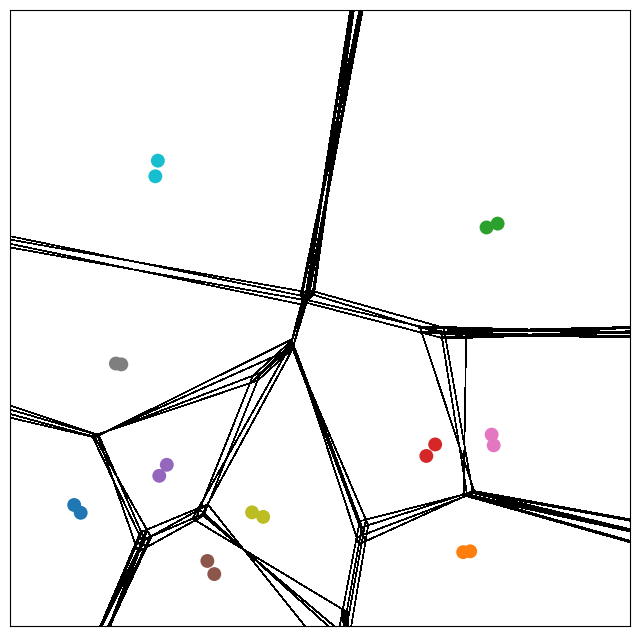

In [ ]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
import itertools

xmin, xmax, ymin, ymax, min_dist = 10, 90, 10, 90, 10

# Generate initial set of points
points = []
for _ in range(10):
    while True:
        x, y = np.random.uniform(xmin, xmax), np.random.uniform(ymin, ymax)
        point = np.array([x, y])

        if all(np.linalg.norm(point - p) >= min_dist for p in points):
            points.append(point)
            break
points = np.array(points)

# Generate translations (deplacements)
delta_x = np.random.uniform(-3, 3, 10)
delta_y = np.random.uniform(-3, 3, 10)
deplacements = np.column_stack((delta_x, delta_y))

# Generate binary sequences
binary_sequences = list(itertools.product([0, 1], repeat=10))

# Create a color dictionary for the points
colors_dict = {}
for i in range(1, 11):
    colors_dict[i] = plt.cm.get_cmap('tab10')(i % 10)

# Plotting
fig, ax = plt.subplots(figsize=(8, 8))

# Calculate the center of all points to use in the line drawing
center = points.mean(axis=0)

# Iterate over binary sequences to create Voronoi tessellations
for seq in binary_sequences:
    permutation_points = np.array([points[i] + deplacements[i] * seq[i] for i in range(10)])
    vor = Voronoi(permutation_points)

    # Draw Voronoi diagram
    voronoi_plot_2d(vor, show_points=False, show_vertices=False, ax=ax, line_colors='black', line_width=0.5, alpha=1)

    # Draw solid lines for infinite ridges
    for pointidx, simplex in zip(vor.ridge_points, vor.ridge_vertices):
        simplex = np.asarray(simplex)
        if np.any(simplex < 0):
            i = simplex[simplex >= 0][0]  # finite end Voronoi vertex
            t = vor.points[pointidx[1]] - vor.points[pointidx[0]]  # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal
            midpoint = vor.points[pointidx].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[i] + direction * vor.points.ptp(axis=0).max()
            ax.plot([vor.vertices[i,0], far_point[0]],
                    [vor.vertices[i,1], far_point[1]], 'k-')

# Plot the points
for i, point in enumerate(points):
    ax.scatter(point[0], point[1], c=colors_dict[i+1], s=100, marker='o', edgecolor='none', alpha=1)

translated_points = points + deplacements
for i, point in enumerate(translated_points):
    ax.scatter(point[0], point[1], c=colors_dict[i+1], s=100, marker='o', edgecolor='none', alpha=1)

plt.xlim(0, 110)
plt.ylim(0, 110)
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
def count_permutations(length):
    return 2 ** length

num_permutations = count_permutations(10)
print(f"Number of permutations: {num_permutations}")

Number of permutations: 1024


<ipython-input-5-09aeccf70467>:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors_list = [plt.cm.get_cmap('tab10')(i) for i in range(len(points))]
<ipython-input-5-09aeccf70467>:93: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(new_point[0], new_point[1], c=colors_list[i-1], s=100, marker='o', edgecolor='none', alpha=1)


Moyenne de la distance de Hausdorff : 20.780868289665886
Ecart-type de la distance de Hausdorff : 27.425104340343296


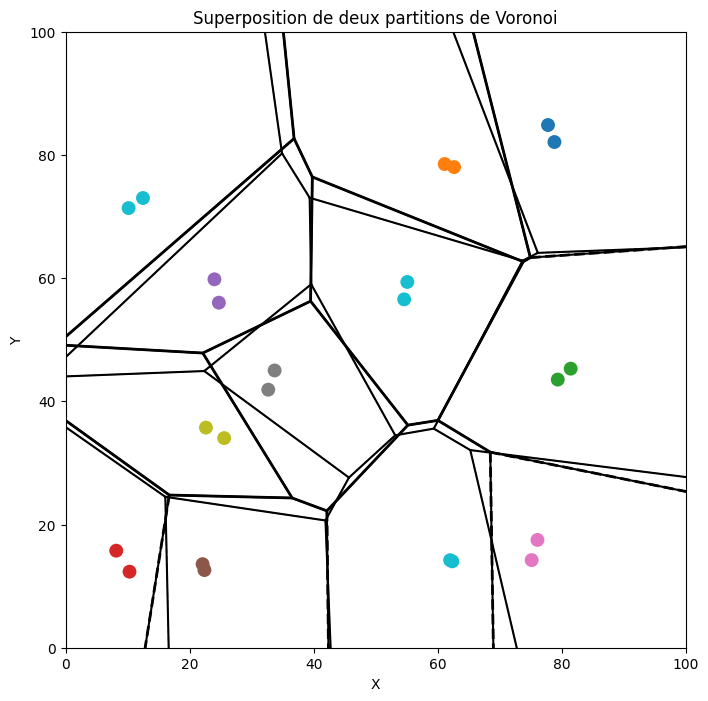

In [ ]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
from scipy.spatial.distance import cdist, directed_hausdorff
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Définir les limites de l'espace
xmin, xmax, ymin, ymax = 10, 90, 10, 90

# Définir la distance minimale entre les points
min_dist = 10

# Initialiser une liste pour stocker les points
points = []

# Générer les points
for _ in range(12):
    while True:
        # Générer un point aléatoire
        x, y = np.random.uniform(xmin, xmax), np.random.uniform(ymin, ymax)
        point = np.array([x, y])

        # Vérifier si le point est suffisamment éloigné des autres points
        if all(np.linalg.norm(point - p) >= min_dist for p in points):
            points.append(point)
            break

# Convertir la liste des points en un tableau numpy
points = np.array(points)

# Générer des déplacements aléatoires pour chaque coordonnée
delta_x = np.random.uniform(-4, 4, 12)  # Changez ici de 5 à 10
delta_y = np.random.uniform(-4, 4, 12)  # Changez ici de 5 à 10

# Créer de nouveaux points en ajoutant les déplacements aux coordonnées originales
points_nouveaux = points + np.array([delta_x, delta_y]).T

# Créer la première tessellation de Voronoi
vor1 = Voronoi(points)

# Créer la seconde tessellation de Voronoi avec les points nouveaux
vor2 = Voronoi(points_nouveaux)

# Créer une liste de couleurs différentes pour chaque point
colors_list = [plt.cm.get_cmap('tab10')(i) for i in range(len(points))]

# Afficher la tessellation de Voronoi sans les points et les sommets
fig, ax = plt.subplots(figsize=(8, 8))
voronoi_plot_2d(vor1, show_points=False, show_vertices=False, ax=ax, line_colors='gray', line_width=1, alpha=0.5)
voronoi_plot_2d(vor2, show_points=False, show_vertices=False, ax=ax, line_colors='black', line_width=2)

# Traçage manuel des lignes infinies pour la première tessellation
center1 = vor1.points.mean(axis=0)
for pointidx, simplex in zip(vor1.ridge_points, vor1.ridge_vertices):
    simplex = np.asarray(simplex)
    if np.all(simplex >= 0):
        ax.plot(vor1.vertices[simplex, 0], vor1.vertices[simplex, 1], 'k-')
    else:
        i = simplex[simplex >= 0][0]  # finite end Voronoi vertex
        t = vor1.points[pointidx[1]] - vor1.points[pointidx[0]]  # tangent
        t /= np.linalg.norm(t)
        n = np.array([-t[1], t[0]])  # normal
        midpoint = vor1.points[pointidx].mean(axis=0)
        direction = np.sign(np.dot(midpoint - center1, n)) * n
        far_point = vor1.vertices[i] + direction * vor1.points.ptp(axis=0).max()

        ax.plot([vor1.vertices[i,0], far_point[0]],
                [vor1.vertices[i,1], far_point[1]], 'k-')

# Traçage manuel des lignes infinies pour la seconde tessellation
center2 = vor2.points.mean(axis=0)
for pointidx, simplex in zip(vor2.ridge_points, vor2.ridge_vertices):
    simplex = np.asarray(simplex)
    if np.all(simplex >= 0):
        ax.plot(vor2.vertices[simplex, 0], vor2.vertices[simplex, 1], 'k-')
    else:
        i = simplex[simplex >= 0][0]  # finite end Voronoi vertex
        t = vor2.points[pointidx[1]] - vor2.points[pointidx[0]]  # tangent
        t /= np.linalg.norm(t)
        n = np.array([-t[1], t[0]])  # normal
        midpoint = vor2.points[pointidx].mean(axis=0)
        direction = np.sign(np.dot(midpoint - center2, n)) * n
        far_point = vor2.vertices[i] + direction * vor2.points.ptp(axis=0).max()

        ax.plot([vor2.vertices[i,0], far_point[0]],
                [vor2.vertices[i,1], far_point[1]], 'k-')

# Créer des points de données supplémentaires avec des couleurs pour les points
colored_points = plt.scatter(points[:, 0], points[:, 1], c=colors_list, s=100, marker='o', edgecolor='none', alpha=1)

# Ajouter les nouveaux points au graphique avec les mêmes couleurs
for i, new_point in enumerate(points_nouveaux, 1):
    plt.scatter(new_point[0], new_point[1], c=colors_list[i-1], s=100, marker='o', edgecolor='none', alpha=1)

# Calculer la distance de Hausdorff entre les cellules de Voronoi correspondantes
hausdorff_distances = []
for point_idx, region_idx in enumerate(vor1.point_region):
    region1 = vor1.regions[region_idx]
    if -1 not in region1:  # Ignorer les régions non bornées
        polygon1 = vor1.vertices[region1]
        region2 = vor2.regions[vor2.point_region[point_idx]]
        polygon2 = vor2.vertices[region2]
        if -1 not in region2:  # Ignorer les régions non bornées
            # Calculer la distance de Hausdorff dans les deux sens et prendre le maximum
            d_forward = directed_hausdorff(polygon1, polygon2)[0]
            d_backward = directed_hausdorff(polygon2, polygon1)[0]
            hausdorff_distance = max(d_forward, d_backward)
            hausdorff_distances.append(hausdorff_distance)

# Afficher la moyenne et l'écart-type des distances de Hausdorff
print(f"Moyenne de la distance de Hausdorff : {np.mean(hausdorff_distances)}")
print(f"Ecart-type de la distance de Hausdorff : {np.std(hausdorff_distances)}")

# Limiter la vue
plt.xlim(0, 100)
plt.ylim(0, 100)

plt.title("It doesn't look like it, but there are 1024 tessellations")
plt.xlabel("X")
plt.ylabel("Y")

plt.show()

<ipython-input-37-534316096995>:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors_list = [plt.cm.get_cmap('tab10')(i) for i in range(len(points))]
<ipython-input-37-534316096995>:95: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(new_point[0], new_point[1], c=colors_list[i-1], s=100, marker='o', edgecolor='none', alpha=1)


Moyenne de la distance de Hausdorff : 5.865771592544167
Ecart-type de la distance de Hausdorff : 0.0


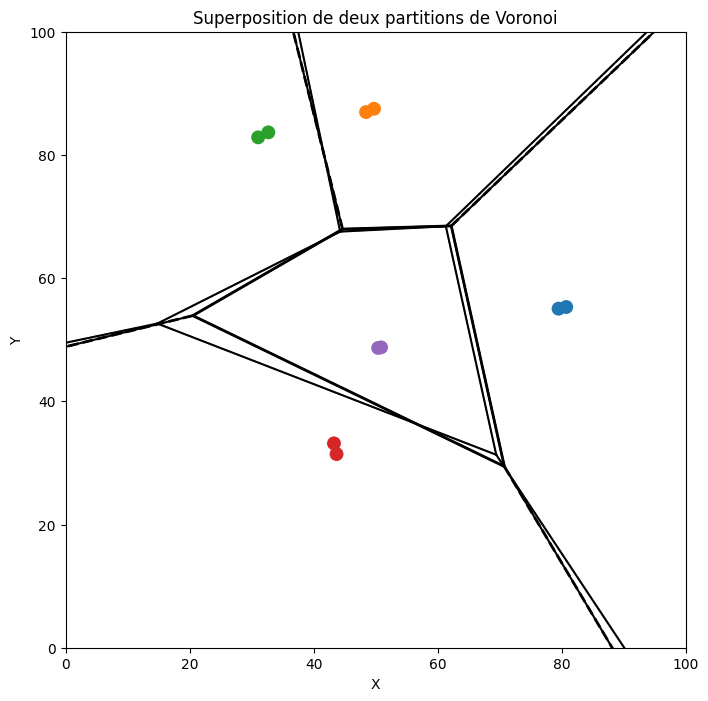

In [ ]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
from scipy.spatial.distance import cdist, directed_hausdorff
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Définir les limites de l'espace
xmin, xmax, ymin, ymax = 10, 90, 10, 90

# Définir la distance minimale entre les points
min_dist = 10

# Initialiser une liste pour stocker les points
points = []

# Générer les points
for _ in range(5):
    while True:
        # Générer un point aléatoire
        x, y = np.random.uniform(xmin, xmax), np.random.uniform(ymin, ymax)
        point = np.array([x, y])

        # Vérifier si le point est suffisamment éloigné des autres points
        if all(np.linalg.norm(point - p) >= min_dist for p in points):
            points.append(point)
            break

# Convertir la liste des points en un tableau numpy
points = np.array(points)

# Générer des déplacements aléatoires pour chaque coordonnée
delta_x = np.random.uniform(-2, 2, 5)
delta_y = np.random.uniform(-2, 2, 5)

# Créer de nouveaux points en ajoutant les déplacements aux coordonnées originales
points_nouveaux = points + np.array([delta_x, delta_y]).T

# Créer la première tessellation de Voronoi
vor1 = Voronoi(points)

# Créer la seconde tessellation de Voronoi avec les points nouveaux
vor2 = Voronoi(points_nouveaux)

# Créer une liste de couleurs différentes pour chaque point
colors_list = [plt.cm.get_cmap('tab10')(i) for i in range(len(points))]



# Afficher la tessellation de Voronoi sans les points et les sommets
fig, ax = plt.subplots(figsize=(8, 8))
voronoi_plot_2d(vor1, show_points=False, show_vertices=False, ax=ax, line_colors='gray', line_width=1, alpha=0.5)
voronoi_plot_2d(vor2, show_points=False, show_vertices=False, ax=ax, line_colors='black', line_width=2)

# Traçage manuel des lignes infinies pour la première tessellation
center1 = vor1.points.mean(axis=0)
for pointidx, simplex in zip(vor1.ridge_points, vor1.ridge_vertices):
    simplex = np.asarray(simplex)
    if np.all(simplex >= 0):
        ax.plot(vor1.vertices[simplex, 0], vor1.vertices[simplex, 1], 'k-')
    else:
        i = simplex[simplex >= 0][0]  # finite end Voronoi vertex
        t = vor1.points[pointidx[1]] - vor1.points[pointidx[0]]  # tangent
        t /= np.linalg.norm(t)
        n = np.array([-t[1], t[0]])  # normal
        midpoint = vor1.points[pointidx].mean(axis=0)
        direction = np.sign(np.dot(midpoint - center1, n)) * n
        far_point = vor1.vertices[i] + direction * vor1.points.ptp(axis=0).max()

        ax.plot([vor1.vertices[i,0], far_point[0]],
                [vor1.vertices[i,1], far_point[1]], 'k-')

# Traçage manuel des lignes infinies pour la seconde tessellation
center2 = vor2.points.mean(axis=0)
for pointidx, simplex in zip(vor2.ridge_points, vor2.ridge_vertices):
    simplex = np.asarray(simplex)
    if np.all(simplex >= 0):
        ax.plot(vor2.vertices[simplex, 0], vor2.vertices[simplex, 1], 'k-')
    else:
        i = simplex[simplex >= 0][0]  # finite end Voronoi vertex
        t = vor2.points[pointidx[1]] - vor2.points[pointidx[0]]  # tangent
        t /= np.linalg.norm(t)
        n = np.array([-t[1], t[0]])  # normal
        midpoint = vor2.points[pointidx].mean(axis=0)
        direction = np.sign(np.dot(midpoint - center2, n)) * n
        far_point = vor2.vertices[i] + direction * vor2.points.ptp(axis=0).max()

        ax.plot([vor2.vertices[i,0], far_point[0]],
                [vor2.vertices[i,1], far_point[1]], 'k-')

# Créer des points de données supplémentaires avec des couleurs pour les points
colored_points = plt.scatter(points[:, 0], points[:, 1], c=colors_list, s=100, marker='o', edgecolor='none', alpha=1)

# Ajouter les nouveaux points au graphique avec les mêmes couleurs
for i, new_point in enumerate(points_nouveaux, 1):
    plt.scatter(new_point[0], new_point[1], c=colors_list[i-1], s=100, marker='o', edgecolor='none', alpha=1)

# Limiter la vue
plt.xlim(0, 100)
plt.ylim(0, 100)

plt.title("Superposition de deux partitions de Voronoi")
plt.xlabel("X")
plt.ylabel("Y")

plt.show()

<ipython-input-4-c45b536b7531>:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors_list = [plt.cm.get_cmap('tab10')(i) for i in range(len(points))]
<ipython-input-4-c45b536b7531>:93: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(new_point[0], new_point[1], c=colors_list[i-1], s=100, marker='o', edgecolor='none', alpha=1)


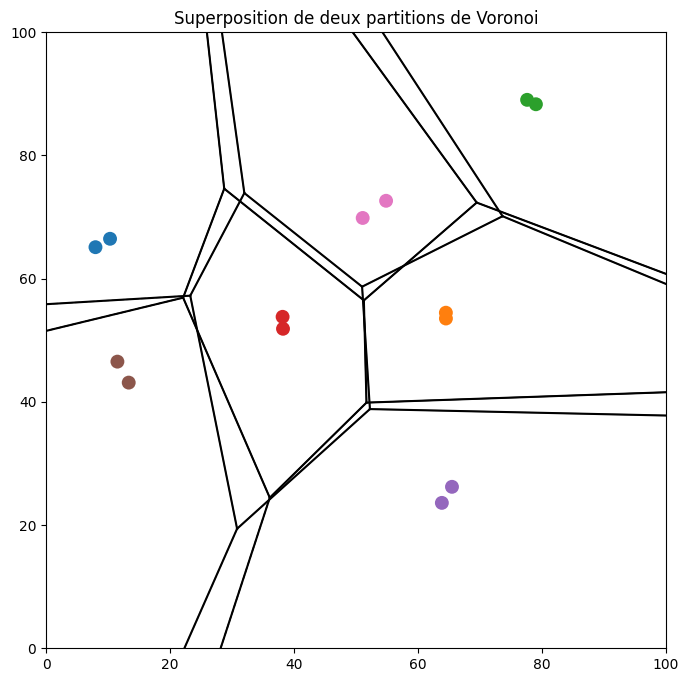

In [ ]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d

import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Définir les limites de l'espace
xmin, xmax, ymin, ymax = 10, 90, 10, 90

# Définir la distance minimale entre les points
min_dist = 10

# Initialiser une liste pour stocker les points
points = []

# Générer les points
for _ in range(7):
    while True:
        # Générer un point aléatoire
        x, y = np.random.uniform(xmin, xmax), np.random.uniform(ymin, ymax)
        point = np.array([x, y])

        # Vérifier si le point est suffisamment éloigné des autres points
        if all(np.linalg.norm(point - p) >= min_dist for p in points):
            points.append(point)
            break

# Convertir la liste des points en un tableau numpy
points = np.array(points)

# Générer des déplacements aléatoires pour chaque coordonnée
delta_x = np.random.uniform(-4, 4, 7)
delta_y = np.random.uniform(-4, 4, 7)

# Créer de nouveaux points en ajoutant les déplacements aux coordonnées originales
points_nouveaux = points + np.array([delta_x, delta_y]).T

# Créer la première tessellation de Voronoi
vor1 = Voronoi(points)

# Créer la seconde tessellation de Voronoi avec les points nouveaux
vor2 = Voronoi(points_nouveaux)

# Créer une liste de couleurs différentes pour chaque point
colors_list = [plt.cm.get_cmap('tab10')(i) for i in range(len(points))]

# Afficher la tessellation de Voronoi sans les points et les sommets
fig, ax = plt.subplots(figsize=(8, 8))
voronoi_plot_2d(vor1, show_points=False, show_vertices=False, ax=ax, line_colors='gray', line_width=1, alpha=0.5)
voronoi_plot_2d(vor2, show_points=False, show_vertices=False, ax=ax, line_colors='black', line_width=1, alpha=0.5)

# Traçage manuel des lignes infinies pour la première tessellation
center1 = vor1.points.mean(axis=0)
for pointidx, simplex in zip(vor1.ridge_points, vor1.ridge_vertices):
    simplex = np.asarray(simplex)
    if np.all(simplex >= 0):
        ax.plot(vor1.vertices[simplex, 0], vor1.vertices[simplex, 1], 'k-')
    else:
        i = simplex[simplex >= 0][0]  # finite end Voronoi vertex
        t = vor1.points[pointidx[1]] - vor1.points[pointidx[0]]  # tangent
        t /= np.linalg.norm(t)
        n = np.array([-t[1], t[0]])  # normal
        midpoint = vor1.points[pointidx].mean(axis=0)
        direction = np.sign(np.dot(midpoint - center1, n)) * n
        far_point = vor1.vertices[i] + direction * vor1.points.ptp(axis=0).max()

        ax.plot([vor1.vertices[i,0], far_point[0]],
                [vor1.vertices[i,1], far_point[1]], 'k-')

# Traçage manuel des lignes infinies pour la seconde tessellation
center2 = vor2.points.mean(axis=0)
for pointidx, simplex in zip(vor2.ridge_points, vor2.ridge_vertices):
    simplex = np.asarray(simplex)
    if np.all(simplex >= 0):
        ax.plot(vor2.vertices[simplex, 0], vor2.vertices[simplex, 1], 'k-')
    else:
        i = simplex[simplex >= 0][0]  # finite end Voronoi vertex
        t = vor2.points[pointidx[1]] - vor2.points[pointidx[0]]  # tangent
        t /= np.linalg.norm(t)
        n = np.array([-t[1], t[0]])  # normal
        midpoint = vor2.points[pointidx].mean(axis=0)
        direction = np.sign(np.dot(midpoint - center2, n)) * n
        far_point = vor2.vertices[i] + direction * vor2.points.ptp(axis=0).max()

        ax.plot([vor2.vertices[i,0], far_point[0]],
                [vor2.vertices[i,1], far_point[1]], 'k-')

# Créer des points de données supplémentaires avec des couleurs pour les points
colored_points = plt.scatter(points[:, 0], points[:, 1], c=colors_list, s=100, marker='o', edgecolor='none', alpha=1)

# Ajouter les nouveaux points au graphique avec les mêmes couleurs
for i, new_point in enumerate(points_nouveaux, 1):
    plt.scatter(new_point[0], new_point[1], c=colors_list[i-1], s=100, marker='o', edgecolor='none', alpha=1)

# Limiter la vue
plt.xlim(0, 100)
plt.ylim(0, 100)

plt.title("Superposition de deux partitions de Voronoi")


plt.show()

In [ ]:
from scipy.spatial.distance import cdist, directed_hausdorff

# Calculer la distance de Hausdorff entre les cellules de Voronoi correspondantes
hausdorff_distances = []
for point_idx, region_idx in enumerate(vor1.point_region):
    region1 = vor1.regions[region_idx]
    if -1 not in region1:  # Ignorer les régions non bornées
        polygon1 = vor1.vertices[region1]
        region2 = vor2.regions[vor2.point_region[point_idx]]
        polygon2 = vor2.vertices[region2]
        if -1 not in region2:  # Ignorer les régions non bornées
            # Calculer la distance de Hausdorff dans les deux sens et prendre le maximum
            d_forward = directed_hausdorff(polygon1, polygon2)[0]
            d_backward = directed_hausdorff(polygon2, polygon1)[0]
            hausdorff_distance = max(d_forward, d_backward)
            hausdorff_distances.append(hausdorff_distance)

# Afficher la moyenne et l'écart-type des distances de Hausdorff
print(f"Moyenne de la distance de Hausdorff : {np.mean(hausdorff_distances)}")
print(f"Ecart-type de la distance de Hausdorff : {np.std(hausdorff_distances)}")

In [ ]:
# Calculer la distance de Hausdorff entre les cellules de Voronoi correspondantes
hausdorff_distances = []
for point_idx, region_idx in enumerate(vor1.point_region):
    region1 = vor1.regions[region_idx]
    if -1 not in region1:  # Ignorer les régions non bornées
        polygon1 = vor1.vertices[region1]
        region2 = vor2.regions[vor2.point_region[point_idx]]
        polygon2 = vor2.vertices[region2]
        if -1 not in region2:  # Ignorer les régions non bornées
            # Calculer la distance de Hausdorff dans les deux sens et prendre le maximum
            d_forward = directed_hausdorff(polygon1, polygon2)[0]
            d_backward = directed_hausdorff(polygon2, polygon1)[0]
            hausdorff_distance = max(d_forward, d_backward)
            hausdorff_distances.append(hausdorff_distance)

# Afficher la moyenne et l'écart-type des distances de Hausdorff
print(f"Moyenne de la distance de Hausdorff : {np.mean(hausdorff_distances)}")
print(f"Ecart-type de la distance de Hausdorff : {np.std(hausdorff_distances)}")

Moyenne de la distance de Hausdorff : 5.865771592544167
Ecart-type de la distance de Hausdorff : 0.0


<ipython-input-28-87e57f0016fa>:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors_list = [plt.cm.get_cmap('tab10')(i) for i in range(len(points))]
<ipython-input-28-87e57f0016fa>:92: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(new_point[0], new_point[1], c=colors_list[i-1], s=100, marker='o', edgecolor='none', alpha=1)


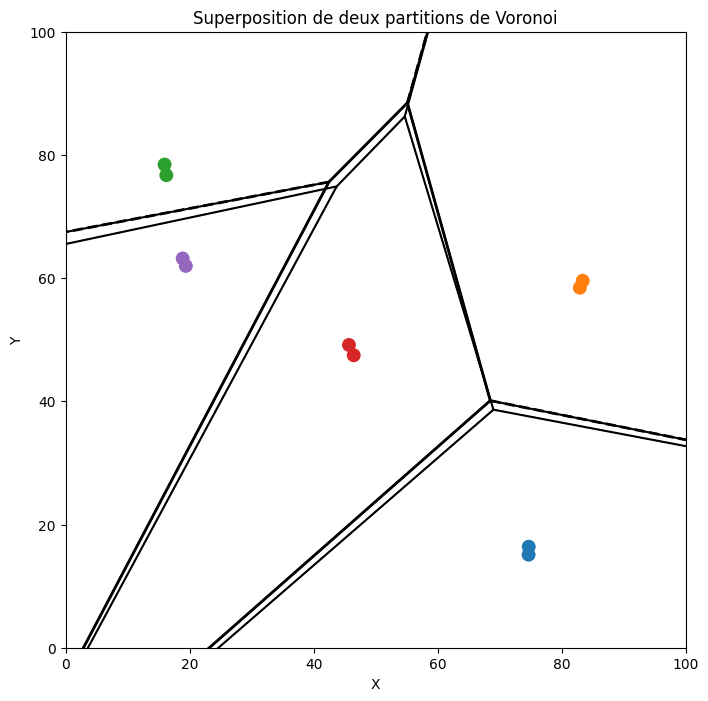

In [ ]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Définir les limites de l'espace
xmin, xmax, ymin, ymax = 10, 90, 10, 90

# Définir la distance minimale entre les points
min_dist = 10

# Initialiser une liste pour stocker les points
points = []

# Générer les points
for _ in range(5):
    while True:
        # Générer un point aléatoire
        x, y = np.random.uniform(xmin, xmax), np.random.uniform(ymin, ymax)
        point = np.array([x, y])

        # Vérifier si le point est suffisamment éloigné des autres points
        if all(np.linalg.norm(point - p) >= min_dist for p in points):
            points.append(point)
            break

# Convertir la liste des points en un tableau numpy
points = np.array(points)

# Générer des déplacements aléatoires pour chaque coordonnée
delta_x = np.random.uniform(-1, 1, 5)
delta_y = np.random.uniform(1, 2, 5)

# Créer de nouveaux points en ajoutant les déplacements aux coordonnées originales
points_nouveaux = points + np.array([delta_x, delta_y]).T

# Créer la première tessellation de Voronoi
vor1 = Voronoi(points)

# Créer la seconde tessellation de Voronoi avec les points nouveaux
vor2 = Voronoi(points_nouveaux)

# Créer une liste de couleurs différentes pour chaque point
colors_list = [plt.cm.get_cmap('tab10')(i) for i in range(len(points))]

# Afficher la tessellation de Voronoi sans les points et les sommets
fig, ax = plt.subplots(figsize=(8, 8))
voronoi_plot_2d(vor1, show_points=False, show_vertices=False, ax=ax, line_colors='gray', line_width=1, alpha=0.5)
voronoi_plot_2d(vor2, show_points=False, show_vertices=False, ax=ax, line_colors='black', line_width=2)

# Traçage manuel des lignes infinies pour la première tessellation
center1 = vor1.points.mean(axis=0)
for pointidx, simplex in zip(vor1.ridge_points, vor1.ridge_vertices):
    simplex = np.asarray(simplex)
    if np.all(simplex >= 0):
        ax.plot(vor1.vertices[simplex, 0], vor1.vertices[simplex, 1], 'k-')
    else:
        i = simplex[simplex >= 0][0]  # finite end Voronoi vertex
        t = vor1.points[pointidx[1]] - vor1.points[pointidx[0]]  # tangent
        t /= np.linalg.norm(t)
        n = np.array([-t[1], t[0]])  # normal
        midpoint = vor1.points[pointidx].mean(axis=0)
        direction = np.sign(np.dot(midpoint - center1, n)) * n
        far_point = vor1.vertices[i] + direction * vor1.points.ptp(axis=0).max()

        ax.plot([vor1.vertices[i,0], far_point[0]],
                [vor1.vertices[i,1], far_point[1]], 'k-')

# Traçage manuel des lignes infinies pour la seconde tessellation
center2 = vor2.points.mean(axis=0)
for pointidx, simplex in zip(vor2.ridge_points, vor2.ridge_vertices):
    simplex = np.asarray(simplex)
    if np.all(simplex >= 0):
        ax.plot(vor2.vertices[simplex, 0], vor2.vertices[simplex, 1], 'k-')
    else:
        i = simplex[simplex >= 0][0]  # finite end Voronoi vertex
        t = vor2.points[pointidx[1]] - vor2.points[pointidx[0]]  # tangent
        t /= np.linalg.norm(t)
        n = np.array([-t[1], t[0]])  # normal
        midpoint = vor2.points[pointidx].mean(axis=0)
        direction = np.sign(np.dot(midpoint - center2, n)) * n
        far_point = vor2.vertices[i] + direction * vor2.points.ptp(axis=0).max()

        ax.plot([vor2.vertices[i,0], far_point[0]],
                [vor2.vertices[i,1], far_point[1]], 'k-')

# Créer des points de données supplémentaires avec des couleurs pour les points
colored_points = plt.scatter(points[:, 0], points[:, 1], c=colors_list, s=100, marker='o', edgecolor='none', alpha=1)

# Ajouter les nouveaux points au graphique avec les mêmes couleurs
for i, new_point in enumerate(points_nouveaux, 1):
    plt.scatter(new_point[0], new_point[1], c=colors_list[i-1], s=100, marker='o', edgecolor='none', alpha=1)

# Limiter la vue
plt.xlim(0, 100)
plt.ylim(0, 100)

plt.title("Superposition de deux partitions de Voronoi")
plt.xlabel("X")
plt.ylabel("Y")

plt.show()

In [ ]:
import numpy as np
from scipy.spatial.distance import euclidean
from shapely.geometry import Polygon
from scipy.spatial import Voronoi
from scipy.spatial.distance import directed_hausdorff
from shapely.ops import unary_union, cascaded_union
from shapely.geometry import MultiPolygon

# ... (code précédent)

# Calculer la distance entre chaque point et son homologue déplacé
distances = [euclidean(p, p_prime) for p, p_prime in zip(points, points_nouveaux)]

# Convertir les régions de Voronoi en polygones de Shapely
vor1_polygons = [Polygon(vor1.vertices[region]) for point_idx, region in enumerate(vor1.point_region) if -1 not in vor1.regions[region]]
vor2_polygons = [Polygon(vor2.vertices[region]) for point_idx, region in enumerate(vor2.point_region) if -1 not in vor2.regions[region]]

# Trouver l'intersection pour chaque paire de points correspondante
intersections = []
for p, p_prime, poly1, poly2 in zip(points, points_nouveaux, vor1_polygons, vor2_polygons):
    # Trouver le point correspondant dans l'autre tessellation
    other_point_idx = points.index(p_prime)
    other_poly = vor1_polygons[other_point_idx] if p_prime in vor1.points else vor2_polygons[other_point_idx]

    # Intersection des régions de Voronoi
    intersection = poly1.intersection(other_poly)
    intersections.append(intersection)

# Convertir les intersections en géométries multi-polygones
multi_intersections = MultiPolygon(intersections)

# Taille de l'intersection en unités de surface
intersection_areas = [polygon.area for polygon in multi_intersections.geoms]

# Calculer la corrélation entre les distances et les tailles d'intersection
corr, _ = np.corrcoef(distances, intersection_areas)
print(f"Coéfficient de corrélation : {corr}")

<ipython-input-20-73573c4fc7ad>:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors_list = [plt.cm.get_cmap('tab10')(i) for i in range(len(points))]
<ipython-input-20-73573c4fc7ad>:70: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(new_point[0], new_point[1], c=colors_list[i-1], s=100, marker='o', edgecolor='none', alpha=1)


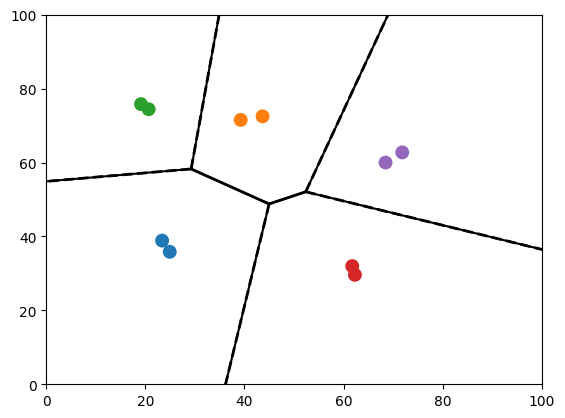

In [ ]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Définir les limites de l'espace
xmin, xmax, ymin, ymax = 10, 90, 10, 90

# Définir la distance minimale entre les points
min_dist = 10

# Initialiser une liste pour stocker les points
points = []

# Générer les points
for _ in range(5):
    while True:
        # Générer un point aléatoire
        x, y = np.random.uniform(xmin, xmax), np.random.uniform(ymin, ymax)
        point = np.array([x, y])

        # Vérifier si le point est suffisamment éloigné des autres points
        if all(np.linalg.norm(point - p) >= min_dist for p in points):
            points.append(point)
            break

# Convertir la liste des points en un tableau numpy
points = np.array(points)

# Générer des déplacements aléatoires pour chaque coordonnée
delta_x = np.random.uniform(-4.5, 4.5, 5)
delta_y = np.random.uniform(-4.5, 4.5, 5)

# Créer de nouveaux points en ajoutant les déplacements aux coordonnées originales
points_nouveaux = points + np.array([delta_x, delta_y]).T

# Créer la tessellation de Voronoi
vor = Voronoi(points)

# Créer une liste de couleurs différentes pour chaque point
colors_list = [plt.cm.get_cmap('tab10')(i) for i in range(len(points))]

# Afficher la tessellation de Voronoi sans les points et les sommets
fig, ax = plt.subplots()
voronoi_plot_2d(vor, show_points=False, show_vertices=False, ax=ax, line_colors='black', line_width=2)

# Tracer manuellement les lignes infinies
center = vor.points.mean(axis=0)
for pointidx, simplex in zip(vor.ridge_points, vor.ridge_vertices):
    simplex = np.asarray(simplex)
    if np.all(simplex >= 0):
        ax.plot(vor.vertices[simplex, 0], vor.vertices[simplex, 1], 'k-')
    else:
        i = simplex[simplex >= 0][0]  # finite end Voronoi vertex
        t = vor.points[pointidx[1]] - vor.points[pointidx[0]]  # tangent
        t /= np.linalg.norm(t)
        n = np.array([-t[1], t[0]])  # normal
        midpoint = vor.points[pointidx].mean(axis=0)
        direction = np.sign(np.dot(midpoint - center, n)) * n
        far_point = vor.vertices[i] + direction * vor.points.ptp(axis=0).max()

        ax.plot([vor.vertices[i,0], far_point[0]],
                [vor.vertices[i,1], far_point[1]], 'k-')

# Créer des points de données supplémentaires avec des couleurs pour les points
colored_points = plt.scatter(points[:, 0], points[:, 1], c=colors_list, s=100, marker='o', edgecolor='none', alpha=1)

# Ajouter les nouveaux points au graphique avec les mêmes couleurs
for i, new_point in enumerate(points_nouveaux, 1):
    plt.scatter(new_point[0], new_point[1], c=colors_list[i-1], s=100, marker='o', edgecolor='none', alpha=1)

# Limiter la vue
plt.xlim(0, 100)
plt.ylim(0, 100)

plt.show()

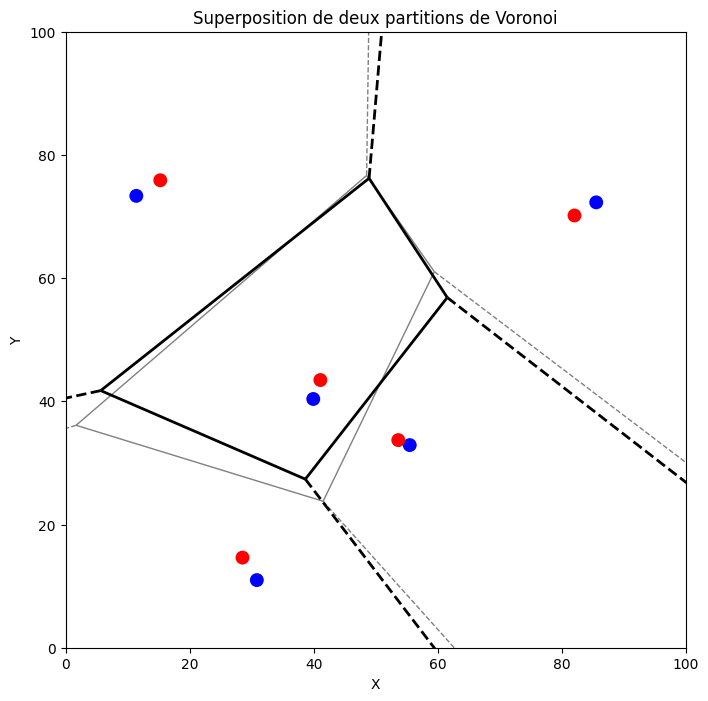

In [ ]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
from scipy.spatial.distance import directed_hausdorff
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Définir les limites de l'espace
xmin, xmax, ymin, ymax = 10, 90, 10, 90

# Définir la distance minimale entre les points
min_dist = 10

# Initialiser une liste pour stocker les points
points = []

# Générer les points
for _ in range(5):
    while True:
        # Générer un point aléatoire
        x, y = np.random.uniform(xmin, xmax), np.random.uniform(ymin, ymax)
        point = np.array([x, y])

        # Vérifier si le point est suffisamment éloigné des autres points
        if all(np.linalg.norm(point - p) >= min_dist for p in points):
            points.append(point)
            break

# Convertir la liste des points en un tableau numpy
points = np.array(points)

# Générer des déplacements aléatoires pour chaque coordonnée
delta_x = np.random.uniform(-4.5, 4.5, 5)
delta_y = np.random.uniform(-4.5, 4.5, 5)

# Créer de nouveaux points en ajoutant les déplacements aux coordonnées originales
points_nouveaux = points + np.array([delta_x, delta_y]).T

# Créer la première tessellation de Voronoi
vor1 = Voronoi(points)

# Créer la seconde tessellation de Voronoi avec les points nouveaux
vor2 = Voronoi(points_nouveaux)

# Afficher la tessellation de Voronoi sans les points et les sommets
fig, ax = plt.subplots(figsize=(8, 8))
voronoi_plot_2d(vor1, show_points=False, show_vertices=False, ax=ax, line_colors='gray', line_width=1, alpha=0.5)
voronoi_plot_2d(vor2, show_points=False, show_vertices=False, ax=ax, line_colors='black', line_width=2)

# Créer des points de données supplémentaires avec des couleurs pour les points
colored_points = plt.scatter(points[:, 0], points[:, 1], c='blue', s=100, marker='o', edgecolor='none', alpha=1)

# Ajouter les nouveaux points au graphique avec une autre couleur
plt.scatter(points_nouveaux[:, 0], points_nouveaux[:, 1], c='red', s=100, marker='o', edgecolor='none', alpha=1)

# Limiter la vue
plt.xlim(0, 100)
plt.ylim(0, 100)

plt.title("Superposition de deux partitions de Voronoi")
plt.xlabel("X")
plt.ylabel("Y")

plt.show()


In [ ]:
for i, point in enumerate(points, 1):
    print(f"p_{i} = ({point[0]}, {point[1]})")

for i, point in enumerate(points_nouveaux, 1):
    print(f"p_{i}^2 = ({point[0]}, {point[1]})")

p_1 = (16.55454698592079, 24.362420531273543)
p_2 = (74.73811579314378, 16.927892266949502)
p_3 = (29.903921045749673, 56.663455752181505)
p_4 = (19.634594325367516, 45.659360998579864)
p_5 = (50.74165918141348, 77.72260478171961)
p_1^2 = (15.719051832983446, 25.09761626675707)
p_2^2 = (71.1530591162185, 13.86215235858294)
p_3^2 = (28.079261771698775, 55.30303042830583)
p_4^2 = (17.973910453937908, 48.75231072132351)
p_5^2 = (50.64425774235695, 78.65768428051139)
